In [44]:
import numpy as np
import cv2
import imutils
from collections import deque
from matplotlib import image as mpimg

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
def tracking(frame):
    
    greenLower = (25,25,25)
    greenUpper = (45,45,45)
    pts = deque(maxlen=64)

    frame = imutils.resize(frame, width=600)
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hsv = blurred
    
    mask = cv2.inRange(hsv, greenLower, greenUpper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)

    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    center = None

    if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        M = cv2.moments(c)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

        # only proceed if the radius meets a minimum size
        if radius > 10:
            # draw the circle and centroid on the frame,
            # then update the list of tracked points
            cv2.circle(frame, (int(x), int(y)), int(radius),
                (0, 255, 255), 2)
            cv2.circle(frame, center, 5, (0, 0, 255), -1)

    # update the points queue
    pts.appendleft(center)

    # loop over the set of tracked points
    for i in xrange(1, len(pts)):
        # if either of the tracked points are None, ignore
        # them
        if pts[i - 1] is None or pts[i] is None:
            continue

        # otherwise, compute the thickness of the line and
        # draw the connecting lines
        thickness = int(np.sqrt(args["buffer"] / float(i + 1)) * 2.5)
        cv2.line(frame, pts[i - 1], pts[i], (0, 0, 255), thickness)

    return frame

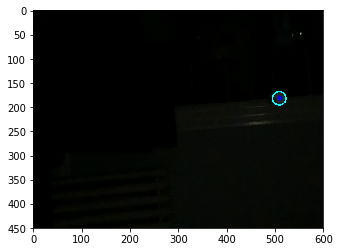

In [70]:
pic = "ppd/pic48.jpg"
out = tracking(mpimg.imread(pic))
plt.imshow(out)

In [31]:
def multi_plot(inp_imgs):
    for img in inp_imgs:
        plt.imshow(img)
        plt.show()

In [51]:
d = 'C:\\Users\\wsutt\\Desktop\\files\\ppd\\ppd'
d += '\\ppd'
d

'C:\\Users\\wsutt\\Desktop\\files\\ppd\\ppd\\ppd'

In [129]:
read_path = 'C:\\Users\\wsutt\\Desktop\\files\\ppd\\ppd'
#read_path = os.getcwd()

files = os.listdir(read_path)

picfn = []
for f in files:
    if 'pic' in f:
        picfn.append(f)
print picfn

fn_nums = map(lambda chars: int( chars.split('pic')[1].split('.')[0] ), picfn )
fn_nums.sort()
ordered_picfn = map( lambda c: "pic"+str(c)+".jpg", fn_nums)

imgs = []
for fn_i in ordered_picfn:
    imgs.append( cv2.imread(readpath + '\\' + fn_i))
    
track_params = []
for _img in imgs:
    track_params.append(track(_img))
    
print len(track_params)
print track_params[:6]

import time
times = []
for _img in imgs:
    t0 = time.time()
    dummy = track(_img)
    t = time.time() - t0
    times.append(t)

print len(times)
print times[11:22]

['pic1.jpg', 'pic10.jpg', 'pic11.jpg', 'pic12.jpg', 'pic13.jpg', 'pic14.jpg', 'pic15.jpg', 'pic16.jpg', 'pic17.jpg', 'pic18.jpg', 'pic19.jpg', 'pic2.jpg', 'pic20.jpg', 'pic21.jpg', 'pic22.jpg', 'pic23.jpg', 'pic24.jpg', 'pic25.jpg', 'pic26.jpg', 'pic27.jpg', 'pic28.jpg', 'pic29.jpg', 'pic3.jpg', 'pic30.jpg', 'pic31.jpg', 'pic32.jpg', 'pic33.jpg', 'pic34.jpg', 'pic35.jpg', 'pic36.jpg', 'pic37.jpg', 'pic38.jpg', 'pic39.jpg', 'pic4.jpg', 'pic40.jpg', 'pic41.jpg', 'pic42.jpg', 'pic43.jpg', 'pic44.jpg', 'pic45.jpg', 'pic46.jpg', 'pic47.jpg', 'pic48.jpg', 'pic49.jpg', 'pic5.jpg', 'pic50.jpg', 'pic51.jpg', 'pic52.jpg', 'pic53.jpg', 'pic54.jpg', 'pic55.jpg', 'pic56.jpg', 'pic57.jpg', 'pic58.jpg', 'pic59.jpg', 'pic6.jpg', 'pic60.jpg', 'pic61.jpg', 'pic62.jpg', 'pic63.jpg', 'pic64.jpg', 'pic65.jpg', 'pic66.jpg', 'pic67.jpg', 'pic68.jpg', 'pic69.jpg', 'pic7.jpg', 'pic70.jpg', 'pic71.jpg', 'pic72.jpg', 'pic73.jpg', 'pic74.jpg', 'pic75.jpg', 'pic76.jpg', 'pic77.jpg', 'pic78.jpg', 'pic79.jpg', 'pic8

In [134]:
#theyre all faster than 30fps
len(filter(lambda x: x < (1.0 / 30.0), times))

89

[0, 4, 66, 67, 79, 82, 84, 85, 86, 87, 88]


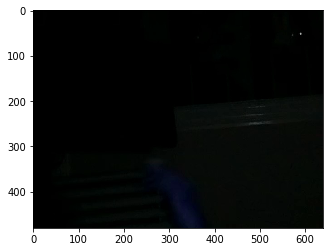

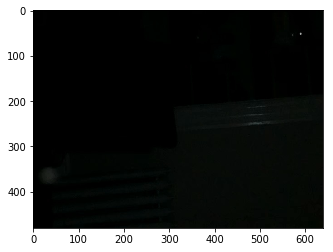

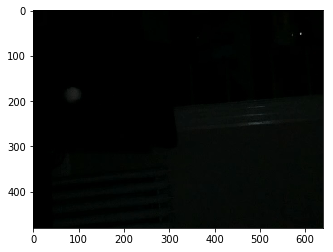

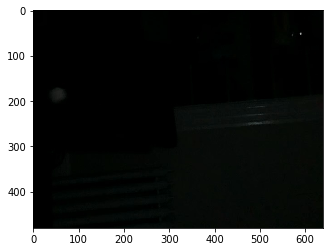

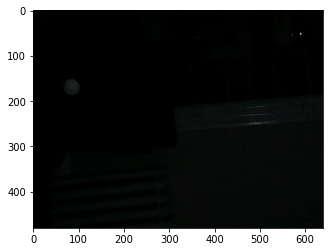

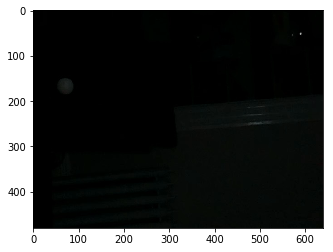

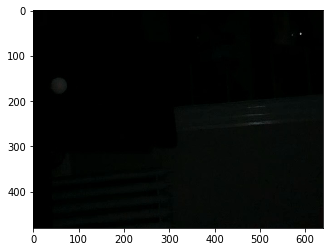

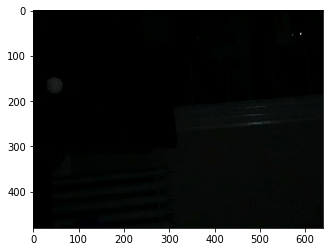

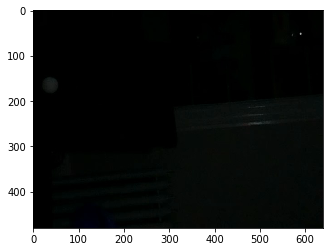

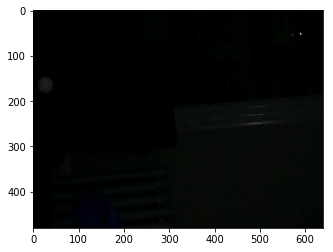

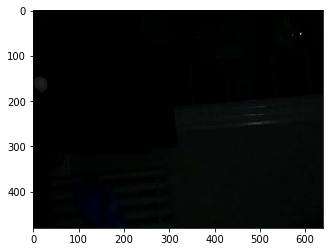

In [140]:
bad_frames= filter(lambda e: e[1][1] < 10, enumerate(track_params) )
bad_frames_ind = map(lambda i: i[0] ,bad_frames)
print bad_frames_ind
bad_imgs = [ imgs[i] for i in bad_frames_ind ]
multi_plot(bad_imgs)

In [ ]:
#now print example results

In [ ]:
#use multiplot, see color differences between opencv (bgr) and maplotlib (rgb)
imgs = []
pic = "9foot.jpg"
imgs.append(cv2.imread(pic))
from matplotlib import image as mpimg
imgs.append(mpimg.imread(pic))
multi_plot(imgs)

In [142]:
my_img = imgs[1]

In [156]:
my_shape = my_img.shape
my_shape

(480, 640, 3)

In [158]:
my_img[0,0,0]

130

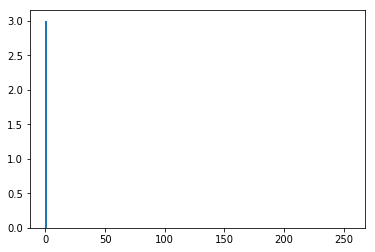

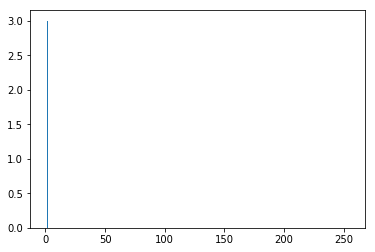

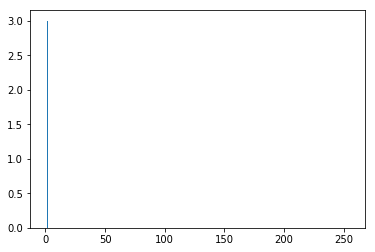

In [185]:
img_fn = "ppd/pic48.jpg" 
my_img = cv2.imread(img_fn)

def flat_3clr(pic):
    return [ tuple([pic[h,w,clr] for clr in range(3)]) for h in range(pic.shape[0]) for w in range(pic.shape[1]) ]
      
bgr_my_img = flat_3clr(my_img)

color_histo = []
for i in range(3):
    color_histo.append(bgr_my_img[i])
    
plt.hist(color_histo[0], bins = 255, range = (0,255))
plt.show()
plt.hist(color_histo[1], bins = 255, range = (0,255))
plt.show()
plt.hist(color_histo[2], bins = 255, range = (0,255))
plt.show()

In [180]:
img_fn = "9foot.jpg" 
my_img = cv2.imread(img_fn)

def flat_3clr(pic):
    return [ tuple([pic[h,w,clr] for clr in range(3)]) for h in range(pic.shape[0]) for w in range(pic.shape[1]) ]
      
bgr_my_img = flat_3clr(my_img)

In [181]:
print len(bgr_my_img)
print 640*480

307200
307200


In [182]:
color_histo = []
for i in range(3):
    color_histo.append(bgr_my_img[i])

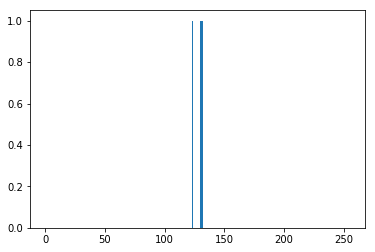

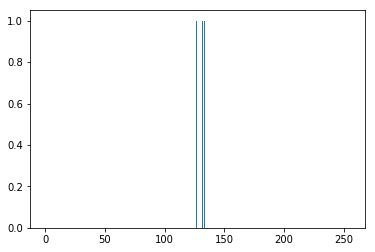

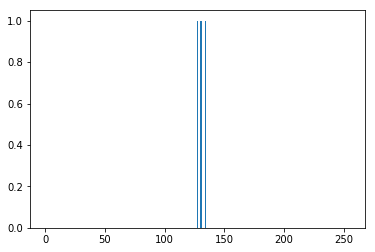

In [183]:
plt.hist(color_histo[0], bins = 255, range = (0,255))
plt.show()
plt.hist(color_histo[1], bins = 255, range = (0,255))
plt.show()
plt.hist(color_histo[2], bins = 255, range = (0,255))
plt.show()

In [75]:
def transform1(frame):
    
    greenLower = (25,25,25)
    greenUpper = (45,45,45)
    pts = deque(maxlen=64)

    #frame = imutils.resize(frame, width=600)
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hsv = blurred
    
    mask = cv2.inRange(hsv, greenLower, greenUpper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    
    return mask

def find_xy(mask):

    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]

    if len(cnts) > 0:
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        
    return (x,y)

def find_radius(mask):

    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]

    if len(cnts) > 0:
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        
        
    return radius

def filter_success(min_radius = 10):
        return radius >= min_radius
            
def draw_tracking1(x,y,radius,frame):
            
    cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
    #cv2.circle(frame, center, 5, (0, 0, 255), -1)

    return frame

In [98]:
def track(pic):
    """ ((x,y),radius)  """
    tframe = transform1(pic)
    center = find_xy(tframe)
    radius = find_radius(tframe)
    return center,radius
    

In [81]:
os.getcwd() + "\\ppd"
tracks()

'C:\\Users\\wsutt\\Desktop\\files\\ppd'

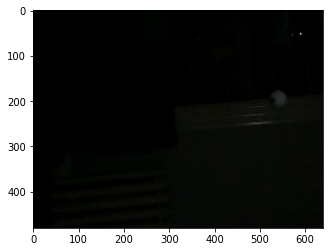

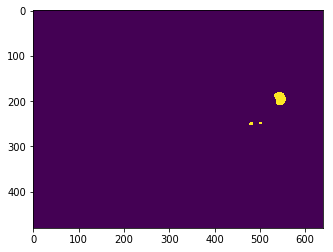

(542.7473754882812, 194.85009765625)
15.2719974518


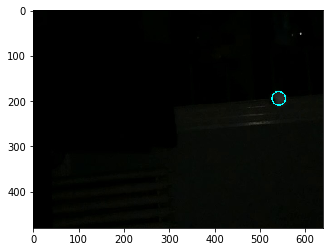

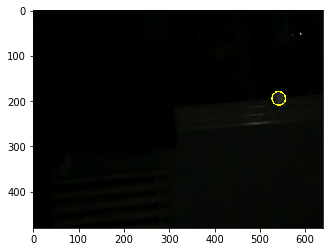

In [78]:
def step_track(pic):
    frame = mpimg.imread(pic)

    plt.imshow(frame)
    plt.show()
    tframe = transform1(frame)
    plt.imshow(tframe)
    plt.show()
    center = find_xy(tframe)
    print center
    radius = find_radius(tframe)
    print radius
    tracked_frame = draw_tracking1(center[0],center[1],radius,frame)
    plt.imshow(tracked_frame)
    plt.show()

    color_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    tracked_frame_color = draw_tracking1(center[0],center[1],radius, color_frame)
    plt.imshow(cv2.cvtColor(tracked_frame_color, cv2.COLOR_BGR2RGB) )
    plt.show()
    
step_track("ppd/pic48.jpg")

In [7]:
import os

In [14]:
print os.getcwd()
print os.listdir("ppd/")

C:\Users\wsutt\Desktop\files\ppd
['.git', '.gitignore', '.ipynb_checkpoints', '1sec.h264', 'ball_tracking_example.mp4', 'book1.html', 'commands.txt', 'demo.html', 'demo5.mp4', 'fbf2.py', 'fbf2.pyc', 'notes.txt', 'opencv_ffmpeg320.dll', 'opencv_ffmpeg320_64.dll', 'openh264-1.4.0-win32msvc.dll', 'openh264-1.4.0-win32msvc.dll.bz2', 'openh264-1.4.0-win64msvc.dll', 'outvid1.h264', 'outvid2.h264', 'outvid3.h264', 'outvid4.h264', 'outvid5.h264', 'outvid6.h264', 'pic1.jpg', 'pic10.jpg', 'pic11.jpg', 'pic12.jpg', 'pic13.jpg', 'pic14.jpg', 'pic15.jpg', 'pic16.jpg', 'pic17.jpg', 'pic18.jpg', 'pic19.jpg', 'pic2.jpg', 'pic20.jpg', 'pic21.jpg', 'pic22.jpg', 'pic23.jpg', 'pic24.jpg', 'pic25.jpg', 'pic26.jpg', 'pic27.jpg', 'pic28.jpg', 'pic29.jpg', 'pic3.jpg', 'pic30.jpg', 'pic31.jpg', 'pic32.jpg', 'pic33.jpg', 'pic34.jpg', 'pic35.jpg', 'pic36.jpg', 'pic37.jpg', 'pic38.jpg', 'pic39.jpg', 'pic4.jpg', 'pic40.jpg', 'pic41.jpg', 'pic42.jpg', 'pic43.jpg', 'pic44.jpg', 'pic45.jpg', 'pic46.jpg', 'pic47.jpg',

TypeError: Image data can not convert to float

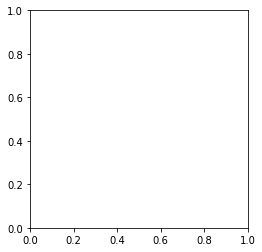

In [9]:
pic = "ppd/pic47.jpg"
plt.imshow(pic,)